## Credit Card Fraud Detection

In this project we will predict fraudulent credit card transactions with the help of Machine learning models. 

Business Problem : We are living in the era of digitization and usage of internet has increased exponentially which includes all domains of business around the world. 
One of the domains that has thrived due to this advancement is Banking sector. As per the reports India registered a 51% growth in digital transactions for the year 2018-19, their safety remains a concern.
Fraudulent activities have increased several folds, with around 52,304 cases of credit/debit card fraud reported in FY'19 alone. Due to this steep increase in banking frauds, 
it is the need of the hour to detect these fraudulent transactions in time in order to help consumers as well as banks, who are losing their credit worth each day. 
Machine learning can play a vital role in detecting fraudulent transactions.

The aim of the project is to utilize modernize tools of future like machine learning to build models capable of detecting fraudulent transactions i.e. 
to predict fraudulent credit card transactions using machine learning models. 

In [1]:
# Importing relevant libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict,StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model 
from sklearn.feature_selection import RFE, RFECV

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier 

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from statistics import mean
import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


## Exploratory data analysis

In [2]:
# Reading the csv file
df = pd.read_csv('/Users/syedsaifullahtarique/Desktop/Work/UpGrad/Capstone Project/creditcard.csv')
# Displaying first few rows of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Data Checks
# observe the different feature type present in the data
# info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Data Checks
# Describe the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# Checking for the null value
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

Class     0.0
V14       0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V15       0.0
Amount    0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Time      0.0
dtype: float64

- Here you could see that there is no null value in the data set

In [6]:
# Distribution of classes
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

In [7]:
# Printing the percantage of normal transaction and fraud transaction
print("Normal Share: ",normal_share)
print("Fraud Share ",fraud_share)

Normal Share:  99.82725143693798
Fraud Share  0.1727485630620034


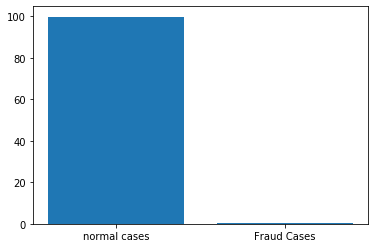

In [8]:
# Creating a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
names = ['normal cases', 'Fraud Cases']
values = [normal_share, fraud_share]
plt.bar(names,values)
plt.show()

- As we can see that the number of cases of the Fraud is very low, which makes the data very imbalanced.

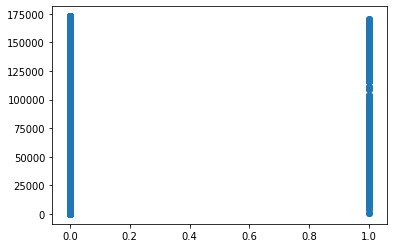

In [9]:
# Creating a scatter plot to observe the distribution of classes with time
plt.scatter(df['Class'],df['Time'])
plt.show()

- Here we can see that the variable Time does not provide any useful information regarding the fraud detection, since the fraud seems to be independent of the variable Time.

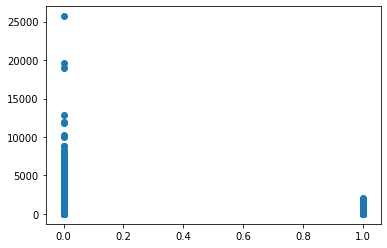

In [10]:
# Creating a scatter plot to observe the distribution of classes with Amount
plt.scatter(df['Class'],df['Amount'])
plt.show()

- Here we can see that the fraud is happening for the transaction happening for the samller amounts.

In [11]:
# Dropping unnecessary columns
# Above we saw that the variable Time does not contribute to the fraud detection, so we will drop that variable.
df = df.drop('Time',axis=1)
# First few rows of the data set.
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Splitting the data into train & test data

In [12]:
# Target variable
y = df['Class']
X = df.drop('Class',axis=1)

In [13]:
# Stratified train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.7,test_size=0.3,random_state=100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [14]:
# Printing the number of fraud in train and test data
print("Total number of fraud: ",np.sum(y))
print("Total number of fraud in training data: ",np.sum(y_train))
print("Total number of fraud in test data: ",np.sum(y_test))

Total number of fraud:  492
Total number of fraud in training data:  344
Total number of fraud in test data:  148


### Plotting the distribution of a variable

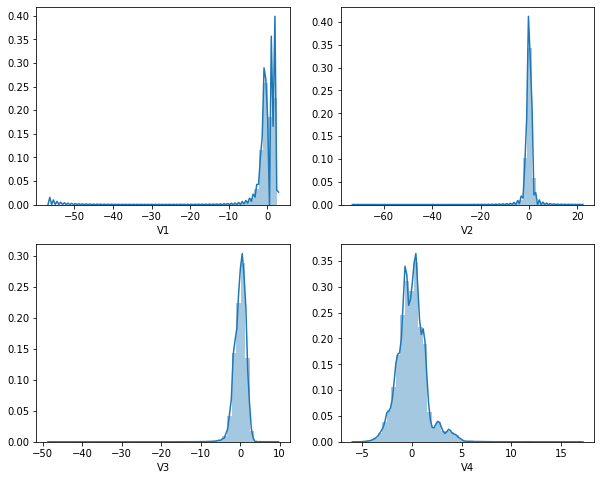

In [15]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(df['V1'])
plt.subplot(2,2,2)
sns.distplot(df['V2'])
plt.subplot(2,2,3)
sns.distplot(df['V3'])
plt.subplot(2,2,4)
sns.distplot(df['V4'])
plt.show()

- Here in the above variables we can see that the data is skeweed.

In [16]:
# Checking for the skewness in each column of variable
X_train.skew()

V1        -3.352780
V2        -4.743314
V3        -2.115044
V4         0.671234
V5        -0.335423
V6         1.213213
V7        -1.054441
V8        -9.048266
V9         0.524853
V10        1.046184
V11        0.337235
V12       -2.187217
V13        0.067930
V14       -1.913552
V15       -0.311223
V16       -1.057503
V17       -3.526079
V18       -0.248354
V19        0.116720
V20       -1.377751
V21        3.490872
V22       -0.218690
V23       -6.872356
V24       -0.540695
V25       -0.429101
V26        0.567342
V27       -2.175241
V28       13.803155
Amount    13.520470
dtype: float64

- Here we can see that data is skeweed both positive and negative

In [17]:
# Doing powertransform to solve skewness using yeo-johnson transformation
pt = PowerTransformer(method='yeo-johnson', copy=False)
# Transforming the train
pt.fit_transform(X_train)

array([[ 1.44569155, -0.17985939, -0.82537101, ..., -0.21338865,
        -0.18593313, -1.44748939],
       [-0.1685569 ,  0.70771555, -0.415595  , ...,  0.57666235,
         0.28299091, -1.13077718],
       [ 1.54055149,  0.05920404, -1.39766213, ..., -0.23217377,
        -0.20541154, -0.86502161],
       ...,
       [ 0.44926405, -0.65653239,  0.44059444, ...,  0.09733236,
         0.20682708,  1.18854512],
       [ 0.22075551, -0.98861027,  0.05561301, ..., -0.18686459,
         0.25017814,  1.56343857],
       [-0.45562581,  0.76260283,  0.24868191, ..., -0.11534124,
        -1.54276014, -1.31557838]])

In [18]:
# Transforming the test data
pt.fit_transform(X_test)

array([[-0.5489728 ,  0.90693893, -0.11880639, ..., -0.10845986,
         0.1682697 ,  0.90614999],
       [ 0.02900078,  1.26298313, -1.42930631, ...,  0.28579121,
        -0.17773486, -0.42121565],
       [ 1.44598086, -0.05876374, -0.93258504, ..., -0.04211333,
        -0.15847193, -0.39336493],
       ...,
       [ 0.40868218, -0.26835173,  0.14282805, ...,  0.08737481,
        -0.00934433,  0.41315897],
       [-1.77970024, -1.85901143,  1.25936891, ...,  1.88347733,
         0.26547971,  0.711806  ],
       [-2.51620799,  4.30563499, -3.29814821, ..., -3.06702976,
         0.72289157,  0.81718011]])

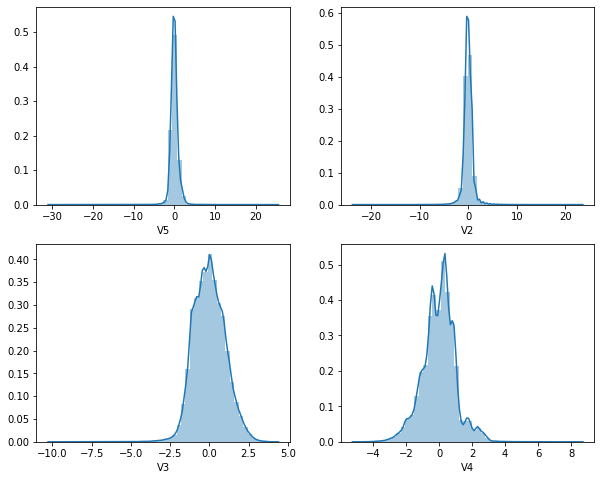

In [19]:
# plot the histogram of a variable from the dataset to see the skewness
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(X_train['V5'])
plt.subplot(2,2,2)
sns.distplot(X_train['V2'])
plt.subplot(2,2,3)
sns.distplot(X_train['V3'])
plt.subplot(2,2,4)
sns.distplot(X_train['V4'])
plt.show()

In [20]:
# Checking the squeness of the training data
X_train.skew()

V1       -0.218659
V2        0.348200
V3       -0.079351
V4        0.018358
V5       -0.346900
V6       -1.993752
V7        0.606021
V8        2.389016
V9       -0.060698
V10      -1.356770
V11       0.057088
V12       0.165318
V13       0.005926
V14       0.108003
V15       0.009912
V16       0.027145
V17      -0.825831
V18      -0.057166
V19       0.016302
V20      -0.481587
V21      -2.081382
V22      -0.019893
V23      -0.020900
V24       0.123275
V25       0.082718
V26      -0.023450
V27       1.326715
V28       1.207900
Amount    0.017888
dtype: float64

- Here we could see that skewness of the variables have been reduced.

In [21]:
# Size of training dataset
X_train.size

5781556

## Model Building
- Build different models on the imbalanced dataset and see the result

In [22]:
# Stratified KFold cross validation with 10 fold
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

#### Logistic Regression

In [147]:
# Logistic Regression using cross validation and roc-auc as scoring matics
lr = LogisticRegression()
scores = cross_val_score(lr, X_train, y_train, scoring = 'roc_auc', cv = folds)
scores

array([0.99873329, 0.97491731, 0.95294698, 0.97869706, 0.98620224])

In [148]:
# Mean of all the scores of cross validation
mean(scores)

0.9782993766643253

#### Decision Tree

In [149]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train, y_train, scoring = 'roc_auc', cv = folds)
scores

array([0.92734781, 0.88379418, 0.88383186, 0.86219323, 0.83068137])

In [150]:
# Mean of all the scores of cross validation
mean(scores)

0.8775696886611403

#### Random Forest

In [151]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, scoring = 'roc_auc', cv = folds)
scores

array([0.97762223, 0.95491768, 0.93284212, 0.93308989, 0.93231947])

In [152]:
# Mean of all the scores of cross validation
mean(scores)

0.9461582802192807

#### XG Boost

In [153]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train, y_train, scoring = 'roc_auc', cv = folds)
scores

array([0.99727542, 0.98641532, 0.97784962, 0.9831322 , 0.98244412])

In [154]:
# Mean of all the scores of cross validation
mean(scores)

0.9854233356404609

## Model building with balancing Classes

### Balancing the data

#### Random Oversampling

In [23]:
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
X_test_ros, y_test_ros = ros.fit_resample(X_test, y_test)

#### SMOTE

In [24]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_test_smote, y_test_smote = smote.fit_resample(X_test, y_test)

## Model Building
- Build different models on the balanced dataset

In [25]:
# Stratified KFold cross validation with 10 fold
folds = StratifiedKFold(n_splits = 5, random_state = 100, shuffle = True)

### Logistic Regression

#### Logistic Regression with Random OverSampling

In [158]:
# Logistic Regression using cross validation and roc-auc as scoring matics
lr = LogisticRegression()
scores = cross_val_score(lr, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = folds)
scores

array([0.98792407, 0.98852421, 0.98903512, 0.98842404, 0.98850964])

In [159]:
# Mean of all the scores of cross validation
mean(scores)

0.9884834152324786

#### Logistic Regression with SMOTE

In [160]:
# Logistic Regression using cross validation and roc-auc as scoring matics
lr = LogisticRegression()
scores = cross_val_score(lr, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = folds)
scores

array([0.99028752, 0.99038476, 0.99085235, 0.990366  , 0.9902643 ])

In [161]:
# Mean of all the scores of cross validation
mean(scores)

0.9904309840204744

- Here in logistic Regression we see that the SMOTE balacing method gives the best result.
- We will use the SMOTE balaced dataset for doing hyperparameter tuning.

#### Hyperparameter tuning of Logistic Regression

In [175]:
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"penalty": ['l1', 'l2'],'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}]
lm = LogisticRegression()
model_cv_lr = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_lr.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_lr.best_estimator_
print('{} algorithm best parameter are : {}'.format('Logistic Regression',best_param))


Logistic Regression algorithm best parameter are : LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


- here we could see that for c =1 and penalty = l2, we get the best result

#### Final model of logistic regression 

In [27]:
# Logistic Regression using cross validation and roc-auc as scoring matics
lr = LogisticRegression(C = 1, penalty = 'l2')
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
# roc-auc score
y_train_pred = lr.predict(X_train_smote)
roc_auc_score(y_train_smote,y_train_pred)

0.9490428097678625

### Random Forest

#### Random Forest with Random OverSampling

In [163]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_ros, y_train_ros, scoring = 'precision', cv = folds)
scores

array([0.99992464, 0.99982417, 0.99992464, 0.99994976, 0.99989952])

In [164]:
# Mean of all the scores of cross validation
mean(scores)

0.9999045431886946

#### Random Forest with SMOTE

In [165]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = folds)
scores

array([0.99999723, 0.99998626, 0.99999829, 0.99999869, 0.99999995])

In [166]:
# Mean of all the scores of cross validation
mean(scores)

0.9999960831463782

- Here in Random Forest Random OverSampling is giving better result so we will use this to tune the hyperparameter

#### Random Forest Hyperparameter tunning

Justification for Individual hyperparameter tuning - We tried tuning all paramters in one go but the execution time was quite high, even tried using Google's Colab and Online GPU supporting frameworks like Nimblebox, But was unable to complete tuning even after running algorith for more than 24 hours.  

In [25]:
# Hyperparameter :Criterion
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"criterion": ["gini", "entropy"]}]
lm = RandomForestClassifier()
model_cv_rf = RandomizedSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_rf.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


- criterion : gini

In [26]:
# Hyperparamter : max_depth
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"max_depth": list(range(2,7,1))}]
lm = RandomForestClassifier(criterion = 'gini')
model_cv_rf = RandomizedSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_rf.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


- max_depth = 6

In [27]:
# Hyperparameter : min_sample_leaf
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"min_samples_leaf": list(range(5,10,1))}]
lm = RandomForestClassifier(criterion = 'gini',max_depth = 6)
model_cv_rf = RandomizedSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_rf.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


- min_sample_leaf = 8

In [28]:
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'max_features': [4, 10, 18, 24]}]
lm = RandomForestClassifier(criterion = 'gini',max_depth = 6,min_samples_leaf = 8)
model_cv_rf = RandomizedSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_rf.fit(X_train_smote, y_train_smote)  
# get the best parameter
best_param = model_cv_rf.best_estimator_
print('{} algorithm best parameter are : {}'.format('Random Forest',best_param))


Random Forest algorithm best parameter are : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


- max_features = 18

#### Final Model for the Random Forest

In [26]:
model_cv_rf = RandomForestClassifier(criterion = 'gini',max_depth = 6,min_samples_leaf = 8,max_features=18)
model_cv_rf.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
y_train_pred = model_cv_rf.predict(X_train_smote)
roc_auc_score(y_train_smote,y_train_pred)

0.9785574314139283

### Decision Tree

#### Decision Tree with Random OverSampling

In [167]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = folds)
scores

array([0.99968596, 0.99978645, 0.99981158, 0.99973621, 0.99977389])

In [168]:
# Mean of all the scores of cross validation
mean(scores)

0.9997588182092252

#### Decision Tree with SMOTE

In [169]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = folds)
scores

array([0.99801527, 0.99845493, 0.99839212, 0.9986936 , 0.99830419])

In [170]:
# Mean of all the scores of cross validation
mean(scores)

0.9983720229122701

- Here in Decision Tree Random OverSampling gives the better result, so we will use this to tune the hyperparameter.

#### Hyperparameter tunning for Decision Tree

In [53]:
# Hyperparameter : Criterion
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"criterion": ["gini", "entropy"]}]
lm = DecisionTreeClassifier()
model_cv_dt = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_dt.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


- Criterion : entropy

In [54]:
# Hyperparameter : Max depth
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"max_depth": list(range(2,10,1))}]
lm = DecisionTreeClassifier(criterion = 'entropy')
model_cv_dt = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_dt.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


- max_depth: 9

In [55]:
# Hyperparameter : min_sample_leaf
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{"min_samples_leaf": list(range(1,10,2))}]
lm = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9)
model_cv_dt = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_dt.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


- min_sample_leaf:3

In [28]:
# Hyperparameter : min_samples_split
# step-1: create a cross-validation scheme
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'min_samples_split': range(2, 20, 2)}]
lm = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9,min_samples_leaf = 3)
model_cv_dt = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_dt.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_dt.best_estimator_
print('{} algorithm best parameter are : {}'.format('Decision Tree',best_param))

Decision Tree algorithm best parameter are : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


- min_sample_split: 16

#### Final Model - Decision Tree

In [29]:
model_cv_dt = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9,min_samples_leaf = 3,min_samples_split=16)     
model_cv_dt.fit(X_train_ros, y_train_ros)  


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=16,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [30]:
y_train_pred = model_cv_dt.predict(X_train_ros)
roc_auc_score(y_train_ros,y_train_pred)

0.9959803034870867

### XGBoost

#### XGBoost with Random OverSampling

In [20]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_ros, y_train_ros, scoring = 'roc_auc', cv = folds)
scores

array([1.        , 0.99998993, 0.99999993, 0.99999582, 1.        ])

In [21]:
# Mean of all the scores of cross validation
mean(scores)

0.9999971363802822

#### XGBoost with SMOTE

In [22]:
xgb = XGBClassifier()
scores = cross_val_score(xgb, X_train_smote, y_train_smote, scoring = 'roc_auc', cv = folds)
scores

array([0.99999632, 0.99999115, 0.99999252, 0.99999123, 0.99999662])

In [23]:
# Mean of all the scores of cross validation
mean(scores)

0.9999935678695571

- Here in XGBoost Random Oversampling gives better result, so we will use this to train the hyperparameter.

In [24]:
# step-1: create a cross-validation scheme
# hyperparameters- Max_depth
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'max_depth':range(3,10,2)}]
lm = XGBClassifier()
model_cv_xgb = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_xgb.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_xgb.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBoost',best_param))


XGBoost algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


In [25]:
# step-1: create a cross-validation scheme
# hyperparameters- min_child_weight
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'min_child_weight':range(1,6,2)}]
lm = XGBClassifier(max_depth=5)
model_cv_xgb = GridSearchCV(lm, hyper_params, cv = folds, scoring = 'roc_auc', return_train_score=True)      

# fit the model
model_cv_xgb.fit(X_train_ros, y_train_ros)  
# get the best parameter
best_param = model_cv_xgb.best_estimator_
print('{} algorithm best parameter are : {}'.format('XGBoost',best_param))


XGBoost algorithm best parameter are : XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)


- min_child_weight : 1

#### Final model of XGBoost

In [31]:
model_cv_xgb = XGBClassifier(max_depth=5,min_child_weight=1)    
model_cv_xgb.fit(X_train_ros, y_train_ros)  

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [32]:
y_train_pred = model_cv_xgb.predict(X_train_ros)
roc_auc_score(y_train_ros,y_train_pred)

0.9997412320369813

#### XGBoost model is being selected as the final model as it has the best ROC_AUC. 

## Running the final model for the test set

In [57]:
# predict
predictions = model_cv_xgb.predict(X_test)

In [59]:
# roc_auc, recall_score, precision_score, f1_score
print("roc_auc :", roc_auc_score(y_test, predictions))
print("Recall :", recall_score(y_test, predictions))
print("Precision :", precision_score(y_test, predictions))
print("F1-Score :", f1_score(y_test, predictions))

roc_auc : 0.9253239551762326
Recall : 0.8513513513513513
Precision : 0.6774193548387096
F1-Score : 0.7544910179640719


In [60]:
# Confusion matrics
confusion = metrics.confusion_matrix(y_test, predictions )
confusion

array([[85235,    60],
       [   22,   126]])

In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score:  0.9990402958697612
Sensitivity:  0.8513513513513513
Specificity:  0.9992965590011138
false postive rate:  0.0007034409988862184
positive predictive value:  0.6774193548387096
Negative predictive value:  0.9997419566721795


## Cost-Benefit Analysis

In [63]:
# total fraud predictions that the model has made (TP + FP)
total_fraud_prediction = TP + FP
total_fraud_prediction

186

In [65]:
# Converting prediction into a Data Frame with index of test dataset
y_predict = pd.DataFrame(data = predictions, columns = ['y_pred'], index = X_test.index.copy())
y_predict

,y_pred
262922,0
123418,0
206135,0
273483,0
245758,0
...,...
109541,0
41813,0
16722,0
36147,0


In [66]:
# Checking for null values
y_predict.isnull().sum()

y_pred    0
dtype: int64

In [67]:
# Merging the original df and y_predict
result = pd.merge(df,y_predict[['y_pred']],how ='left', left_index = True,right_index =True)
result.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,y_pred
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,NaN
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,NaN
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,NaN
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,NaN


In [68]:
# Dropping all the rows having null values so that only test cases remain
result = result.dropna()
result.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,y_pred
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0
9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0,0.0
10,1.449044,-1.176339,0.913860,-1.375667,-1.971383,-0.629152,-1.423236,0.048456,-1.720408,1.626659,...,0.313894,0.027740,0.500512,0.251367,-0.129478,0.042850,0.016253,7.80,0,0.0
17,-0.436905,0.918966,0.924591,-0.727219,0.915679,-0.127867,0.707642,0.087962,-0.665271,-0.737980,...,-0.672638,-0.156858,-0.888386,-0.342413,-0.049027,0.079692,0.131024,0.89,0,0.0
20,0.694885,-1.361819,1.029221,0.834159,-1.191209,1.309109,-0.878586,0.445290,-0.446196,0.568521,...,-0.571955,-0.050881,-0.304215,0.072001,-0.422234,0.086553,0.063499,231.71,0,0.0


In [69]:
# Again checking for the null values
result['y_pred'].isnull().sum()

0

In [70]:
# Data frame of all the people with both y_test and prediction being positive
correct_df = result[(result['Class'] == 1) &(result['y_pred'] == 1)]
correct_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,y_pred
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1,1.0
6529,-1.585505,3.261585,-4.137422,2.357096,-1.405043,-1.879437,-3.513687,1.515607,-1.207166,-6.234561,...,-0.546869,-0.076584,-0.425550,0.123644,0.321985,0.264028,0.132817,1.00,1,1.0
6719,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,-6.810813,...,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00,1,1.0
6820,-2.169929,3.639654,-4.508498,2.730668,-2.122693,-2.341017,-4.235253,1.703538,-1.305279,-6.716720,...,-0.503529,-0.000523,0.071696,0.092007,0.308498,0.552591,0.298954,1.00,1,1.0
6903,-2.535852,5.793644,-7.618463,6.395830,-0.065210,-3.136372,-3.104557,1.823233,-3.878658,-7.297803,...,-0.448060,-0.402407,-0.288835,1.011752,0.425965,0.413140,0.308205,1.00,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258403,-5.976119,-7.196980,-5.388316,5.104799,4.676533,-5.566870,-4.291180,0.876531,-1.075478,-3.272569,...,-0.136262,0.848177,-0.269916,-1.095060,-0.710905,0.565846,-1.034107,296.00,1,1.0
261056,-0.408111,3.132944,-3.098030,5.803893,0.890609,-0.501474,-0.440054,0.591828,-3.267693,-2.223070,...,-0.538375,-0.217989,-1.042657,0.314389,0.543244,0.233851,0.119603,45.51,1,1.0
261925,-2.783865,1.596824,-2.084844,2.512986,-1.446749,-0.828496,-0.732262,-0.203329,-0.347046,-2.162061,...,0.293268,0.199568,0.146868,0.163602,-0.624085,-1.333100,0.428634,156.00,1,1.0
262826,-0.417340,4.700055,-7.521767,7.671884,0.260821,-2.646693,-2.854432,0.958783,-4.588536,-6.120715,...,-0.437708,-0.090358,-0.742802,-0.312361,0.502575,0.821390,0.372379,0.77,1,1.0


In [71]:
# Data frame of all the people with y_test being positive and prediction being negative
losses_df = result[(result['Class'] == 1) &(result['y_pred'] == 0)]
losses_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,y_pred
29687,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,-0.121653,...,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1,0.0
52521,1.001992,0.047938,-0.349002,1.493958,0.186939,0.190966,-0.001112,0.147140,0.580415,-0.792938,...,-1.014315,-0.128427,-0.946242,0.456090,-0.453206,0.046627,0.064698,105.99,1,0.0
55401,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,-0.765054,-0.550545,...,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1.00,1,0.0
58422,-2.790771,-1.464269,1.031165,1.921356,-0.090014,-0.483871,0.780731,-0.348776,0.609133,0.225934,...,0.440020,0.777659,0.418552,0.244563,-0.159361,0.060540,0.356958,208.58,1,0.0
68067,-1.101847,-1.632441,0.901067,0.847753,-1.249091,0.654937,1.448868,0.023308,-0.136742,-0.150129,...,0.835795,1.179955,-0.029091,-0.300896,0.699175,-0.336072,-0.177587,519.90,1,0.0
68633,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,-0.045088,...,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1,0.0
72757,-2.986466,-0.000891,0.605887,0.338338,0.685448,-1.581954,0.504206,-0.233403,0.636768,1.010291,...,-0.509849,1.313918,0.355065,0.448552,0.193490,1.214588,-0.013923,1.79,1,0.0
96341,1.227614,-0.668974,-0.271785,-0.589440,-0.604795,-0.350285,-0.486365,-0.010809,-0.794944,0.264545,...,-0.295255,-0.180459,-0.436539,0.494649,-0.283738,-0.001128,0.035075,98.01,1,0.0
101509,-1.739334,-1.304655,0.314103,0.053740,-0.058696,0.071260,0.694862,-0.313270,-0.649377,0.517568,...,-0.632078,-0.421176,-0.400774,-0.001640,-0.495162,0.031633,0.066280,320.00,1,0.0
112840,-1.111495,-0.257575,2.250210,1.152671,0.432904,1.254126,-0.584163,-0.609682,1.014602,0.334533,...,0.927825,-0.343058,-0.256268,-0.600742,-0.180331,0.026762,-0.358335,45.03,1,0.0


In [72]:
# Total amount where both y_test and y_pred being positive
cost_correct = correct_df['Amount'].sum()
cost_correct

13237.27

In [73]:
# Total amount where y_test positive but y_pred being negative
cost_wrong = losses_df['Amount'].sum()
cost_wrong

4216.04

In [74]:
# savings will be the total amount of correct predictions made:
# TP x Cost of each transaction which is correctly predicted.
savings = TP * cost_correct
savings

1667896.02

In [75]:
# The loss will be the total amount of incorrect predictions made:
# FN x Cost of each transaction which is incorrectly predicted.
loss = FN * cost_wrong
loss

92752.88

In [76]:
# Cost of calling customer to confirm
cost_to_call = 10 * (TP + FP)
cost_to_call

1860

In [77]:
# So the total savings = 
# savings - (cost_to_call + loss)
# (TP x cost of each transaction -[(TP+FP) x 10 + FN x Cost of all transactions])
total_savings = savings - (cost_to_call + loss)
total_savings

1573283.1400000001

#### Therefore the total saving is equal to = 1573283